In [140]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [141]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [142]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [143]:
df.shape

(3554, 18)

In [144]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [145]:
train_df = df.copy()
train_df = train_df.drop(columns=['society', 'price_per_sqft'])

In [146]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


# luxury score

In [147]:
df['luxury_score'].min()

0.0

In [148]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
        

In [149]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None 
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [150]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [151]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy() 
categorical_cols = train_df.select_dtypes(include='object').columns
categorical_cols
oe = OrdinalEncoder()
for col in categorical_cols: 
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

X_train = data_label_encoded.drop(columns = 'price', axis = 1)
y_train = data_label_encoded['price']
    

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [152]:
X_train.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,0.0,2.0


# correlation matrix 

<Axes: >

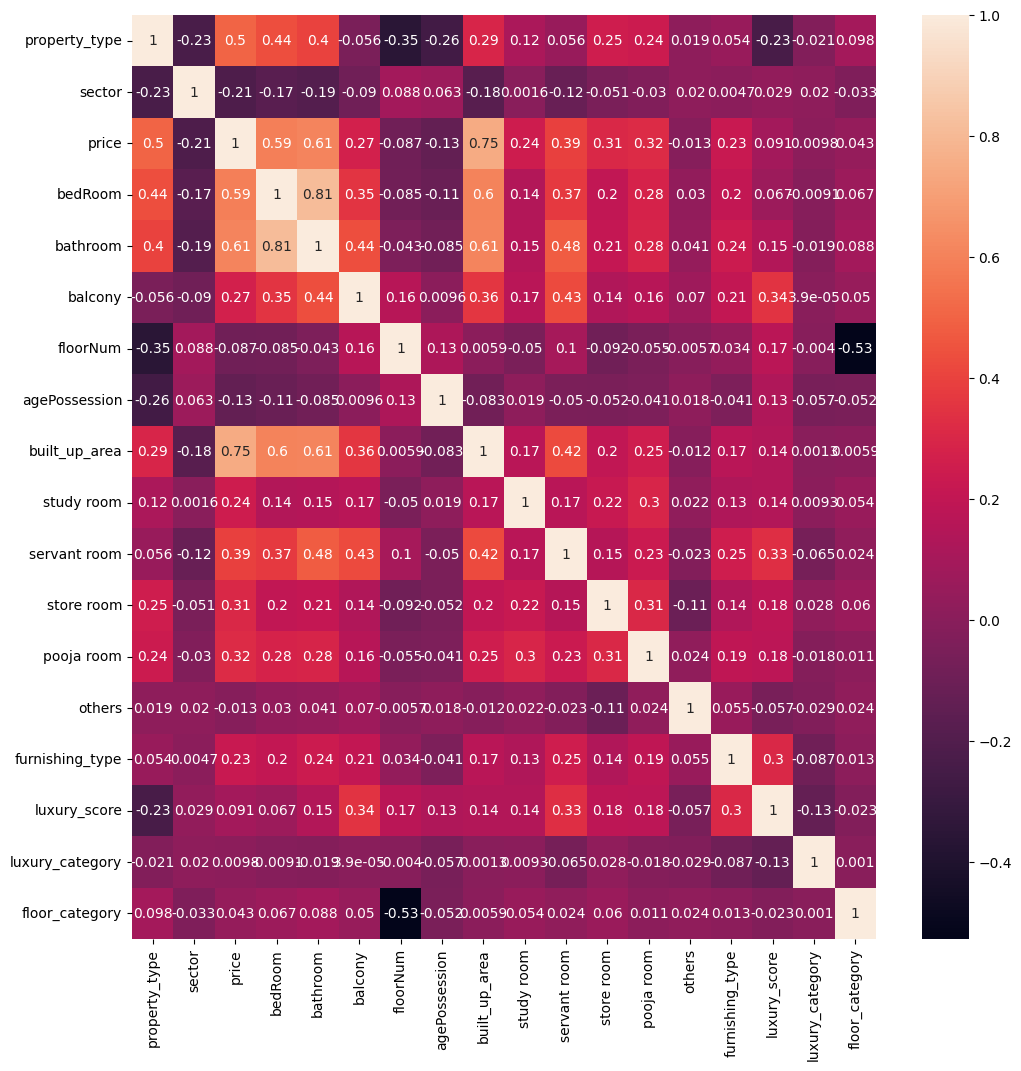

In [153]:
# correlation analysis shows about linear relationship between data 
plt.figure(figsize=(12,12))
sns.heatmap(data_label_encoded.corr(),annot=True)

In [177]:
s = data_label_encoded.corr().loc['price',:]
fi_df1 = pd.DataFrame(s)

In [178]:
fi_df1.reset_index(inplace=True)
fi_df1.rename(columns={'index':'feature','price':'corr_score'}, inplace=True)

In [179]:
# techique 2 random forest regressor 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
fi_df2 = pd.DataFrame({'feature':X_train.columns,'rf_score':rf.feature_importances_})
fi_df2.sort_values(by='rf_score', ascending=False)

,feature,rf_score
7,built_up_area,0.642585
0,property_type,0.098888
1,sector,0.091857
14,luxury_score,0.030110
3,bathroom,0.023248
2,bedRoom,0.020793
5,floorNum,0.017760
9,servant room,0.016622
6,agePossession,0.012006
4,balcony,0.010116


In [184]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
fi_df3 = pd.DataFrame({'feature':X_train.columns,'gdb_score':rf.feature_importances_})
fi_df3.sort_values(by='gdb_score', ascending=False)

,feature,gdb_score
7,built_up_area,0.681751
1,sector,0.097989
0,property_type,0.095160
2,bedRoom,0.037112
3,bathroom,0.035188
9,servant room,0.019315
10,store room,0.008114
14,luxury_score,0.008054
5,floorNum,0.007142
6,agePossession,0.004283


In [181]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_label, y_train_label)
perm_importance = permutation_importance(rf, X_test_label, y_test_label, n_repeats=30, random_state=42)
fi_df4 = pd.DataFrame({
    'feature': X_train.columns,
    'permutation_score': perm_importance.importances_mean
}).sort_values(by='permutation_score', ascending=False)

fi_df4

,feature,permutation_score
7,built_up_area,0.743942
0,property_type,0.196767
1,sector,0.167072
2,bedRoom,0.024898
14,luxury_score,0.023238
3,bathroom,0.020524
9,servant room,0.014224
5,floorNum,0.011739
6,agePossession,0.005605
4,balcony,0.001498


# technique - 5 lasso

In [182]:
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_train)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_train.columns,
    'lasso_score': lasso.coef_
}).sort_values(by='lasso_score', ascending=False)

fi_df5



,feature,lasso_score
7,built_up_area,1.508337
0,property_type,0.724342
3,bathroom,0.273855
10,store room,0.200596
8,study room,0.173045
13,furnishing_type,0.163675
9,servant room,0.158688
11,pooja room,0.073823
15,luxury_category,0.055427
5,floorNum,0.031086


# technique - 6 RFE

In [183]:
from sklearn.feature_selection import RFE
estimator = RandomForestRegressor()
selector_label = RFE(estimator, n_features_to_select=X_train.shape[1], step=1)
selector_label = selector_label.fit(X_train, y_train)

# Get the selected features based on RFE
selected_features = X_train.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.641756
0,property_type,0.101797
1,sector,0.095106
14,luxury_score,0.030908
3,bathroom,0.022084
2,bedRoom,0.021499
5,floorNum,0.019088
9,servant room,0.014864
6,agePossession,0.011636
4,balcony,0.009781


# technique - 7 Linear regression weights


In [161]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

lr.fit(X_scaled, y_train)

fi_df7 = pd.DataFrame({'feature':X_train.columns, 'lr_score':lr.coef_}).sort_values(by = 'lr_score', ascending = False)
fi_df7

,feature,lr_score
7,built_up_area,1.511095
0,property_type,0.732980
3,bathroom,0.276914
10,store room,0.203230
8,study room,0.180868
13,furnishing_type,0.170202
9,servant room,0.164185
11,pooja room,0.076779
15,luxury_category,0.067926
5,floorNum,0.056843


# technique - 8 shap

In [165]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.85575536e-01,  1.24365092e-01, -3.39239645e-02, ...,
        -2.44066274e-02,  1.36666690e-03,  2.21129500e-05],
       [-1.98714692e-01, -3.96702687e-01, -4.34778639e-02, ...,
         1.12118763e-02,  1.44851493e-04,  2.37319100e-03],
       [-1.78832472e-01, -4.30622816e-01, -4.21387869e-02, ...,
         1.29379203e-02, -4.16531927e-03, -9.11080874e-03],
       ...,
       [-1.88100920e-01,  8.02394429e-02, -1.28700492e-02, ...,
         2.84384664e-02,  1.00474449e-03,  3.93456122e-03],
       [ 1.46415846e+00,  8.74824706e-01,  2.98701351e-01, ...,
         1.56232221e-01,  3.28366205e-02,  5.70208630e-02],
       [-3.31784285e-01, -6.80387101e-03, -2.20646038e-02, ...,
         1.15220707e-03, -1.97693015e-02, -4.57637269e-03]])

In [166]:
fi_df8 = pd.DataFrame({
    'feature': X_train.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,built_up_area,1.259272
0,property_type,0.476210
1,sector,0.358914
3,bathroom,0.110325
9,servant room,0.078697
14,luxury_score,0.056529
5,floorNum,0.052725
2,bedRoom,0.046769
4,balcony,0.031921
6,agePossession,0.024332


In [247]:
final_df_score = fi_df1.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').merge(fi_df8, on='feature')

In [248]:
final_df_score.set_index('feature', inplace=True)
final_df_score

,corr_score,rf_score,gdb_score,permutation_score,lasso_score,rfe_score,lr_score,SHAP_score
feature,,,,,,,,
property_type,0.503728,0.098888,0.095160,0.196767,0.724342,0.101797,0.732980,0.476210
sector,-0.212084,0.091857,0.097989,0.167072,-0.070667,0.095106,-0.080424,0.358914
bedRoom,0.591289,0.020793,0.037112,0.024898,0.015578,0.021499,0.020601,0.046769
bathroom,0.609777,0.023248,0.035188,0.020524,0.273855,0.022084,0.276914,0.110325
balcony,0.269637,0.010116,0.000967,0.001498,-0.046980,0.009781,-0.075874,0.031921
floorNum,-0.087442,0.017760,0.007142,0.011739,0.031086,0.019088,0.056843,0.052725
agePossession,-0.134171,0.012006,0.004283,0.005605,-0.000000,0.011636,-0.004443,0.024332
built_up_area,0.748574,0.642585,0.681751,0.743942,1.508337,0.641756,1.511095,1.259272
study room,0.242955,0.007530,0.002548,-0.006285,0.173045,0.005754,0.180868,0.018120


In [249]:
final_df_score.sum(axis=0)

corr_score           3.906288
rf_score             1.000000
gdb_score            1.000000
permutation_score    1.202015
lasso_score          3.243861
rfe_score            1.000000
lr_score             3.304075
SHAP_score           2.577446
dtype: float64

In [250]:
final_df_score = final_df_score.divide(final_df_score.sum(axis = 0), axis = 1)
final_df_score

,corr_score,rf_score,gdb_score,permutation_score,lasso_score,rfe_score,lr_score,SHAP_score
feature,,,,,,,,
property_type,0.128953,0.098888,0.095160,0.163698,0.223296,0.101797,0.221841,0.184761
sector,-0.054293,0.091857,0.097989,0.138993,-0.021785,0.095106,-0.024341,0.139252
bedRoom,0.151368,0.020793,0.037112,0.020714,0.004802,0.021499,0.006235,0.018145
bathroom,0.156101,0.023248,0.035188,0.017075,0.084422,0.022084,0.083810,0.042804
balcony,0.069026,0.010116,0.000967,0.001246,-0.014483,0.009781,-0.022964,0.012385
floorNum,-0.022385,0.017760,0.007142,0.009766,0.009583,0.019088,0.017204,0.020456
agePossession,-0.034347,0.012006,0.004283,0.004663,-0.000000,0.011636,-0.001345,0.009440
built_up_area,0.191633,0.642585,0.681751,0.618912,0.464982,0.641756,0.457343,0.488574
study room,0.062196,0.007530,0.002548,-0.005228,0.053345,0.005754,0.054741,0.007030


In [230]:
final_df_score.columns.to_list()

['corr_score',
 'rf_score',
 'gdb_score',
 'permutation_score',
 'lasso_score',
 'rfe_score',
 'lr_score',
 'SHAP_score']

In [252]:
final_df_score[[
 'rf_score',
 'gdb_score',
 'permutation_score',
 'rfe_score',
 'SHAP_score']].mean(axis = 1).sort_values(ascending = False)

feature
built_up_area      0.614715
property_type      0.128861
sector             0.112639
bathroom           0.028080
bedRoom            0.023653
luxury_score       0.022067
servant room       0.018633
floorNum           0.014843
agePossession      0.008406
balcony            0.006899
store room         0.005302
furnishing_type    0.004999
study room         0.003527
pooja room         0.002810
luxury_category    0.001593
floor_category     0.001549
others             0.001424
dtype: float64

In [254]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')


array([0.84349819, 0.80301153, 0.82498389, 0.79467388, 0.8283043 ])

In [257]:
scores.mean()


0.8188943595648315

In [259]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_train.drop(columns=['pooja room', 'study room', 'others']), y_train, cv=5, scoring='r2')

In [260]:
scores.mean()

0.8138528617325337

In [262]:
export_df = X_train.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_train

In [263]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [264]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,8.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,0.0,0.0,38.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,49.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,1.0,0.0,1.0,174.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,1.0,0.0,159.0,0.0,2.0,0.48
